# Clustering and Dimensionality Reduction

## Introduction
In this notebook, we will explore various clustering and dimensionality reduction techniques. Clustering helps in grouping similar data points together, whereas dimensionality reduction helps in reducing the number of features while preserving the essential information.
---
# Clustering
## K-Means Clustering
### Explanation
K-Means is a popular clustering algorithm that partitions the data into K clusters, with each data point belonging to the cluster with the nearest mean.
### Code Example: Simple 2D Dataset

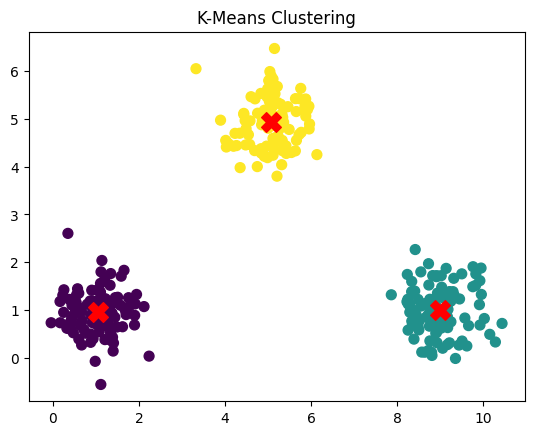

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate a simple 2D dataset
X = np.vstack([np.random.normal(loc, 0.5, (100, 2)) for loc in [(1, 1), (5, 5), (9, 1)]])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.show()

### Code Example: Synthetic IMU-like Time Series Data

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Generate synthetic IMU-like data
def generate_imu_data(n_samples=1000):
    np.random.seed(0)
    t = np.linspace(0, 10, n_samples)
    data = {
        'acc_x': np.sin(t) + 0.1 * np.random.randn(n_samples),
        'acc_y': np.cos(t) + 0.1 * np.random.randn(n_samples),
        'acc_z': np.sin(2 * t) + 0.1 * np.random.randn(n_samples),
        'gyro_x': np.cos(2 * t) + 0.1 * np.random.randn(n_samples),
        'gyro_y': np.sin(3 * t) + 0.1 * np.random.randn(n_samples),
        'gyro_z': np.cos(3 * t) + 0.1 * np.random.randn(n_samples)
    }
    return pd.DataFrame(data)

imu_data = generate_imu_data()

# Standardize the data
scaler = StandardScaler()
imu_data_scaled = scaler.fit_transform(imu_data)

# Apply K-Means clustering
kmeans_imu = KMeans(n_clusters=3)
imu_labels = kmeans_imu.fit_predict(imu_data_scaled)

# Add labels to the data
imu_data['label'] = imu_labels
imu_data['label'].value_counts()

imu_data.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,0.176405,1.055596,-0.153292,1.159327,0.061335,1.030972,1
1,0.050026,1.089197,-0.151178,1.056672,0.214396,0.925804,1
2,0.117892,0.957568,0.044643,0.987750,0.087133,0.844505,1
3,0.254115,1.010021,-0.035813,1.023360,0.203613,0.939719,1
4,0.226785,1.022004,0.071913,0.875710,-0.054002,0.832843,1


## Agglomerative Hierarchical Clustering
### Explanation
Agglomerative Hierarchical Clustering is a bottom-up approach where each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
### Code Example: Simple 2D Dataset

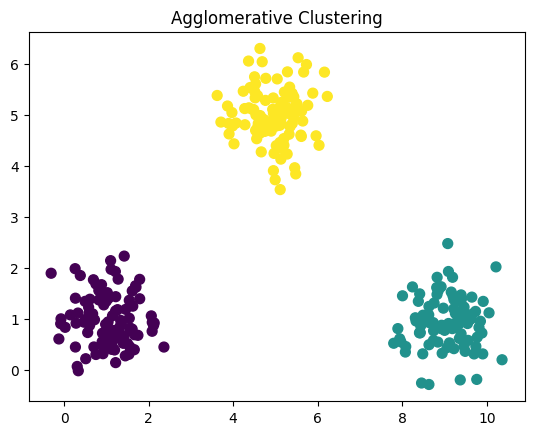

In [3]:
from sklearn.cluster import AgglomerativeClustering

# Generate a simple 2D dataset
X = np.vstack([np.random.normal(loc, 0.5, (100, 2)) for loc in [(1, 1), (5, 5), (9, 1)]])

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

### Code Example: Synthetic IMU-like Time Series Data

In [4]:
# Apply Agglomerative Clustering
agg_clustering_imu = AgglomerativeClustering(n_clusters=3)
imu_labels_agg = agg_clustering_imu.fit_predict(imu_data_scaled)

# Add labels to the data
imu_data['label_agg'] = imu_labels_agg
imu_data['label_agg'].value_counts()

imu_data.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,label_agg
0,0.176405,1.055596,-0.153292,1.159327,0.061335,1.030972,1,0
1,0.050026,1.089197,-0.151178,1.056672,0.214396,0.925804,1,0
2,0.117892,0.957568,0.044643,0.987750,0.087133,0.844505,1,0
3,0.254115,1.010021,-0.035813,1.023360,0.203613,0.939719,1,0
4,0.226785,1.022004,0.071913,0.875710,-0.054002,0.832843,1,0


## DBSCAN
### Explanation
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions.
### Code Example: Simple 2D Dataset

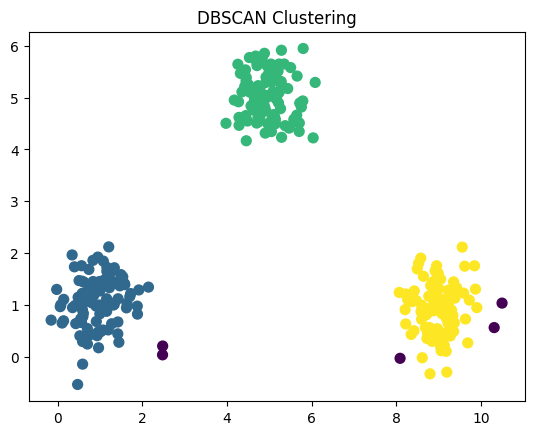

In [5]:
from sklearn.cluster import DBSCAN

# Generate a simple 2D dataset
X = np.vstack([np.random.normal(loc, 0.5, (100, 2)) for loc in [(1, 1), (5, 5), (9, 1)]])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

### Code Example: Synthetic IMU-like Time Series Data

In [6]:
# Apply DBSCAN
dbscan_imu = DBSCAN(eps=0.5, min_samples=5)
imu_labels_dbscan = dbscan_imu.fit_predict(imu_data_scaled)

# Add labels to the data
imu_data['label_dbscan'] = imu_labels_dbscan
imu_data['label_dbscan'].value_counts()

imu_data.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,label_agg,label_dbscan
0,0.176405,1.055596,-0.153292,1.159327,0.061335,1.030972,1,0,0
1,0.050026,1.089197,-0.151178,1.056672,0.214396,0.925804,1,0,0
2,0.117892,0.957568,0.044643,0.987750,0.087133,0.844505,1,0,0
3,0.254115,1.010021,-0.035813,1.023360,0.203613,0.939719,1,0,0
4,0.226785,1.022004,0.071913,0.875710,-0.054002,0.832843,1,0,0


# Dimensionality Reduction
## Principal Component Analysis (PCA)
### Explanation
PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It reduces the dimensionality of the data while preserving as much variance as possible.
### Code Example: High-Dimensional Dataset

/var/folders/34/clsvw2l15hs_ll06sqs_jb9m0000gn/T/ipykernel_35431/1490423519.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, cmap='viridis')


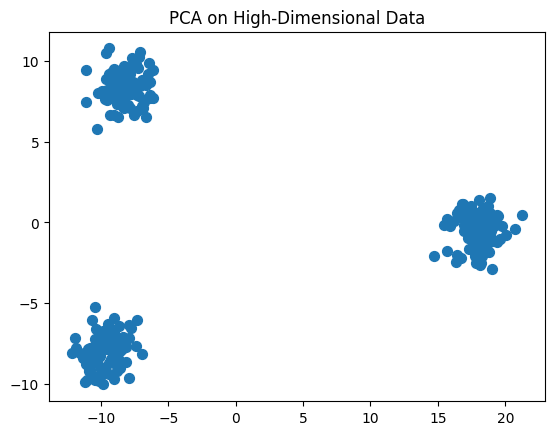

In [7]:
# Generate a high-dimensional dataset
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=10, centers=3, random_state=42)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, cmap='viridis')
plt.title('PCA on High-Dimensional Data')
plt.show()

### Code Example: Synthetic IMU-like Time Series Data

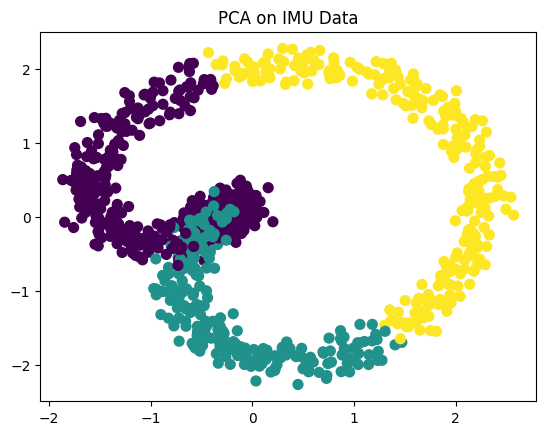

In [8]:
# Apply PCA on IMU Data
from sklearn.decomposition import PCA
pca_imu = PCA(n_components=2)
imu_data_pca = pca_imu.fit_transform(imu_data_scaled)

# Plot the results
plt.scatter(imu_data_pca[:, 0], imu_data_pca[:, 1], c=imu_data['label'], s=50, cmap='viridis')
plt.title('PCA on IMU Data')
plt.show()

## t-SNE
### Explanation
t-SNE is a nonlinear dimensionality reduction technique that is particularly well suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.
### Code Example: High-Dimensional Dataset

/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/var/folders/34/clsvw2l15hs_ll06sqs_jb9m0000gn/T/ipykernel_35431/999265895.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=50, cmap='viridis')


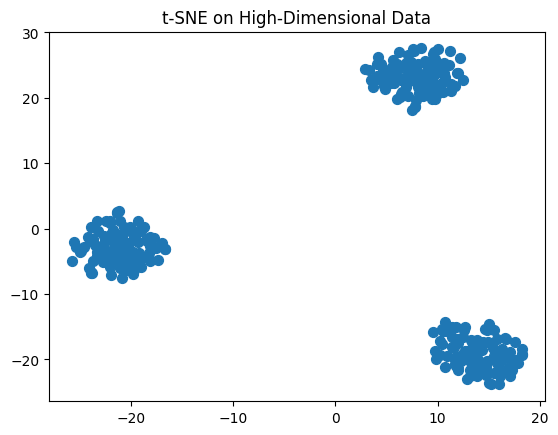

In [9]:
# Apply t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=50, cmap='viridis')
plt.title('t-SNE on High-Dimensional Data')
plt.show()

### Code Example: Synthetic IMU-like Time Series Data

/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/konak/opt/anaconda3/envs/note/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


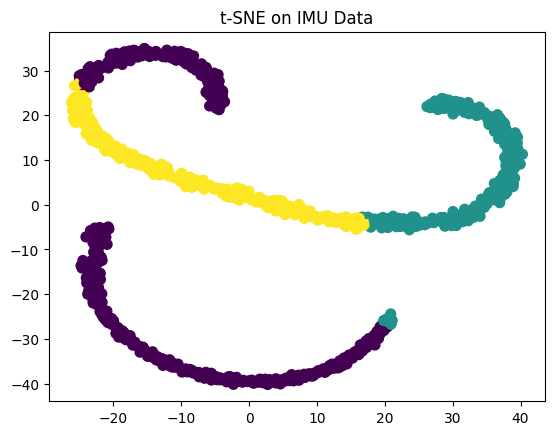

In [10]:
# Apply t-SNE on IMU Data
X_tsne_imu = tsne.fit_transform(imu_data_scaled)

# Plot the results
plt.scatter(X_tsne_imu[:, 0], X_tsne_imu[:, 1], c=imu_data['label'], s=50, cmap='viridis')
plt.title('t-SNE on IMU Data')
plt.show()